In [17]:
# Import modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img, img_to_array
import warnings 
from keras.layers import Dense, Dropout, Convolution2D, Flatten, MaxPooling2D


In [18]:
warnings.filterwarnings("ignore") # Ignore warnings

In [19]:

TRAIN_DIR = 'Facial-Expression-dataset/test'
TEST_DIR = 'Facial-Expression-dataset/test'


In [20]:
# load the dataset

def load_dataset(directory):
    image_paths = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)  
        if os.path.isdir(label_path):  # check it's a folder
            for filename in os.listdir(label_path):
                image_path = os.path.join(label_path, filename)
                image_paths.append(image_path)
                labels.append(label)
            print(label, "completed")
    return image_paths, labels  

In [21]:
# convert to dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
# convert labels to categorical
train['label'] = pd.Categorical(train['label'])
train.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,Facial-Expression-dataset/test\surprise\Privat...,surprise
1,Facial-Expression-dataset/test\sad\PublicTest_...,sad
2,Facial-Expression-dataset/test\happy\PublicTes...,happy
3,Facial-Expression-dataset/test\happy\PublicTes...,happy
4,Facial-Expression-dataset/test\surprise\Privat...,surprise


In [22]:
# convert to dataframe
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,Facial-Expression-dataset/test\angry\PrivateTe...,angry
1,Facial-Expression-dataset/test\angry\PrivateTe...,angry
2,Facial-Expression-dataset/test\angry\PrivateTe...,angry
3,Facial-Expression-dataset/test\angry\PrivateTe...,angry
4,Facial-Expression-dataset/test\angry\PrivateTe...,angry


<Axes: xlabel='label', ylabel='count'>

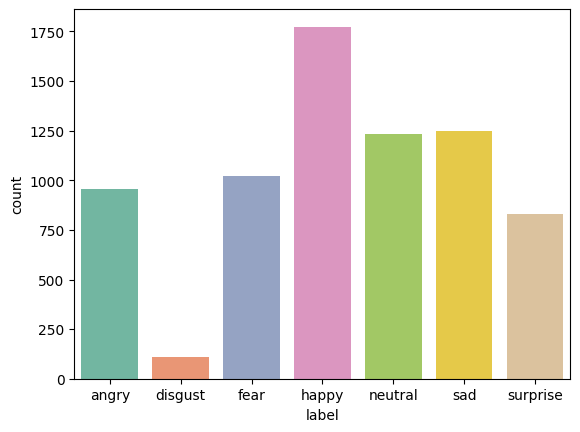

In [23]:
sns.countplot(x='label', data=train, palette='Set2')

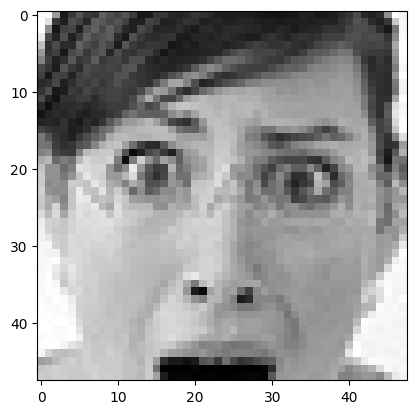

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(train['image'][0])
# Display the image in grayscale
plt.imshow(img, cmap='gray')
plt.show()


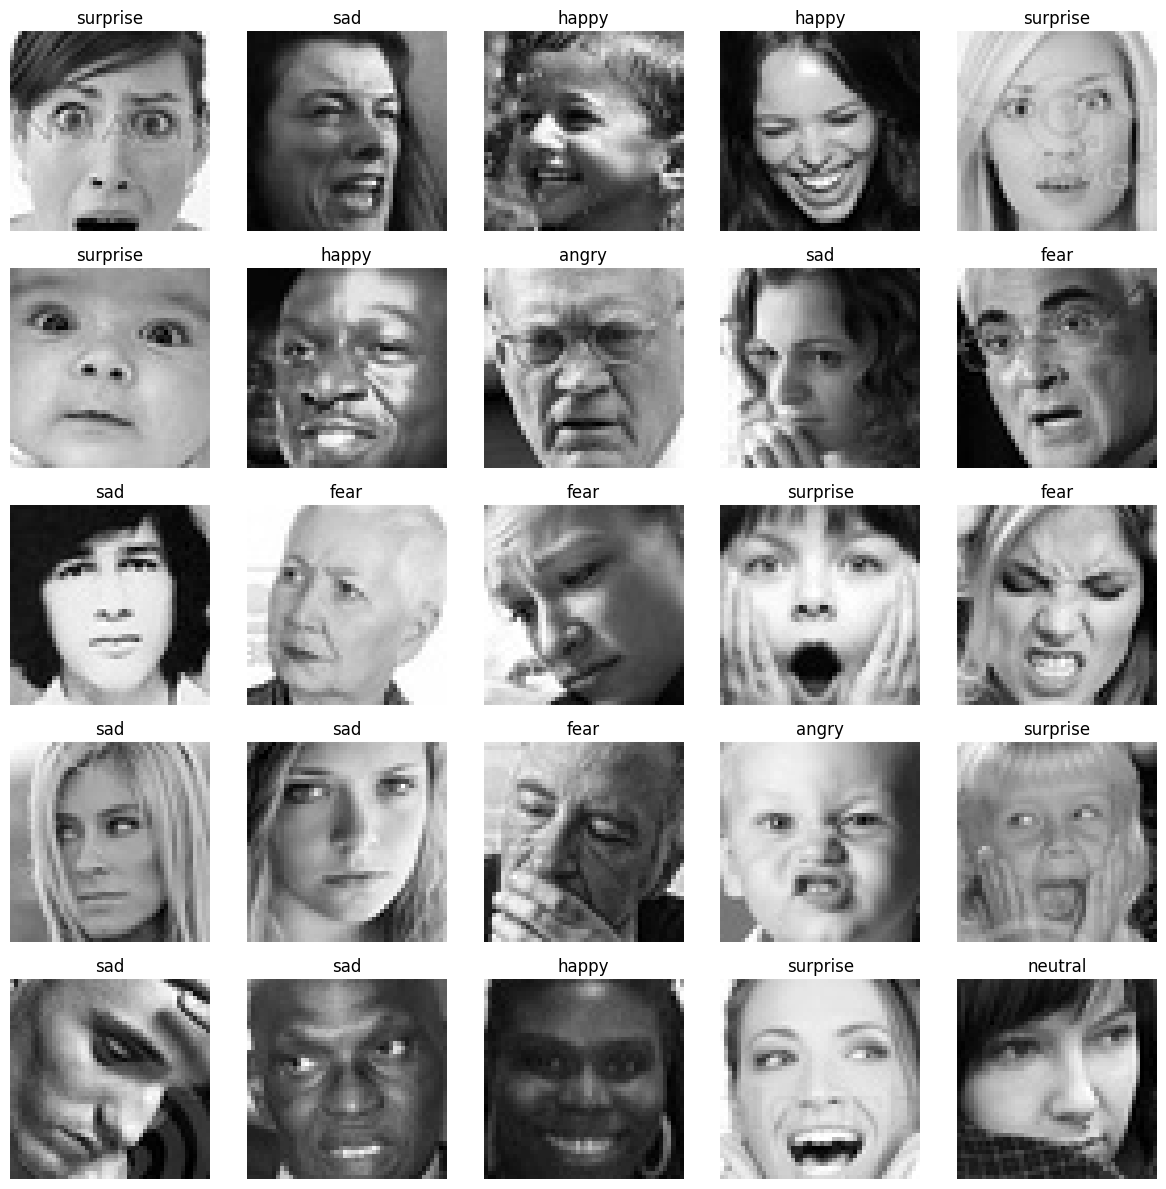

In [28]:
# display grid of images
plt.figure(figsize=(12, 12))

# Select first 25 rows (image and label columns)
files = train.iloc[:25]

# Loop through each row (index, row)
for index, row in files.iterrows():
    plt.subplot(5, 5, index % 25 + 1)
    
    # Load image in grayscale and resize
    img = load_img(row['image'], color_mode='grayscale', target_size=(48, 48))
    img = img_to_array(img)
    
    # Display image
    plt.imshow(img.reshape(48, 48), cmap='gray')
    plt.title(row['label'])
    plt.axis('off')

plt.tight_layout()
plt.show()
